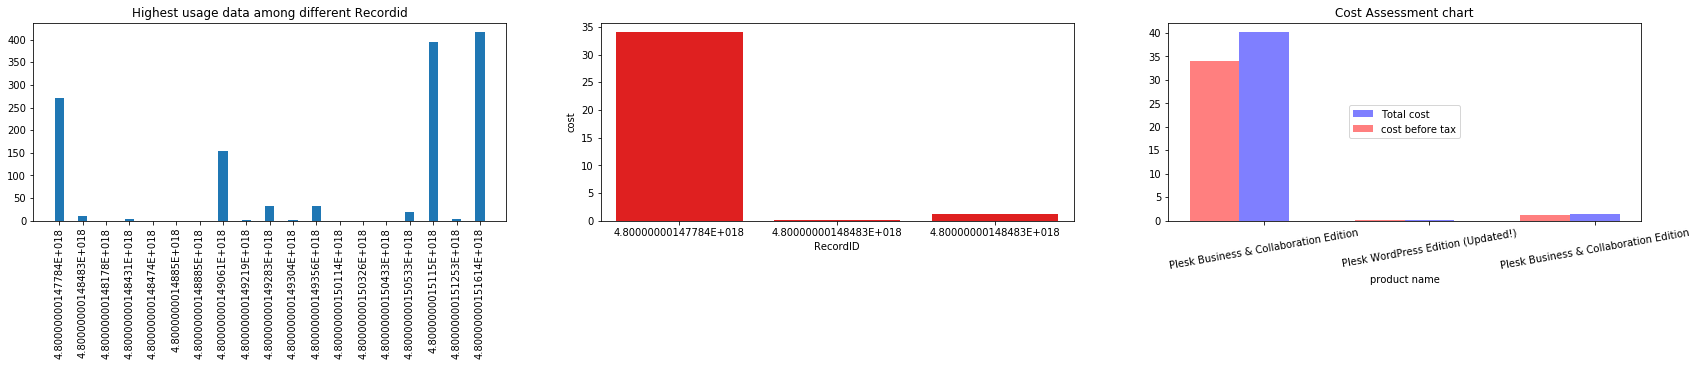

In [150]:

#!/usr/bin/env python
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame as f
from pandas import Series as s
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(100,8))


aws=pd.read_csv("125285659386-aws-billing-csv-2019-01.csv",encoding='latin-1')
#print aws


#awsE=aws[aws['InvoiceID']=='Estimated']
#print awsE
awsp=aws[aws['RecordType']=='PayerLineItem']
awsr=awsp['RecordID'].unique()
l1=list(awsr)
#print awsr

l2=list()
for i in l1:
    awsi=aws[aws['RecordID']==i]
    awss= awsi.sort_values('UsageQuantity',ascending=0).head(1)
    l2.append(awss['UsageQuantity'])
#print l2
s1=s(l1)
s2=s(l2)


plt.subplot(2,10,1)
plt.bar(x=s1,height=s2,width=0.4)
plt.xticks(rotation=90)
plt.title("Highest usage data among different Recordid")
awsE=aws[aws['InvoiceID']=='Estimated']
"""for j in range(2,21):
    plt.subplot(2,10,j)
    for i in l1:
        awsi=awsE[awsE['RecordID']==i]
   

        awssort= awsi.sort_values('TotalCost',ascending=0).head(2)
        plt.xticks(rotation=90)
        plt.bar(x=awssort['ProductName'],height=awssort['TotalCost'],width=0.4)
        plt.title("RecordID"+" "+str(i))"""

awsmp=aws[aws['InvoiceID']=='Estimated_MP']
awsmp1=awsmp[awsmp['RecordType']=='PayerLineItem']
#print awsmp
plt.subplot(2,10,2)
l3=list()
for i1 in range(len(awsmp1)):
    l3.append(i1)

s3=s(l3)
l4=list(awsmp1['TotalCost'])
s4=s(l4)

l5=list(awsmp1['CostBeforeTax'])
s5=s(l5)

g=sns.barplot(x=s3-4,y=s5,color='Red')

g.set(xticklabels=awsmp1['RecordID'])
g.set(xlabel='RecordID', ylabel='cost')



barwidth=.3
sobj=plt.subplot(2,10,3)
x_val=np.arange(len(awsmp1))
sobj.bar(x_val+barwidth,s4,width=barwidth,alpha=0.5,color='b',label='Total cost')
sobj.bar(x_val,s5,width=barwidth,alpha=0.5,color='r',label='cost before tax')
sobj.set_xticks(x_val+barwidth)
sobj.set_xticklabels(awsmp1['ProductName'])
sobj.set_xlabel('product name')
sobj.set_title('Cost Assessment chart')
sobj.legend(loc='center')
plt.xticks(rotation=10)
plt.show()  




    